<h3><font style="color:red;">Title:- </font>
  : Implement CNN for MNIST/CIFAR10 dataset using tensorflow
</h3>

<h3><font style="color:red;">Objectives:- </font><br>
1. To learn basics of deep learning<br>
2. To learn and implement CNN
 </h3>

<h3><font style="color:red;">Theory:</font></h3>

### CNN Architecture


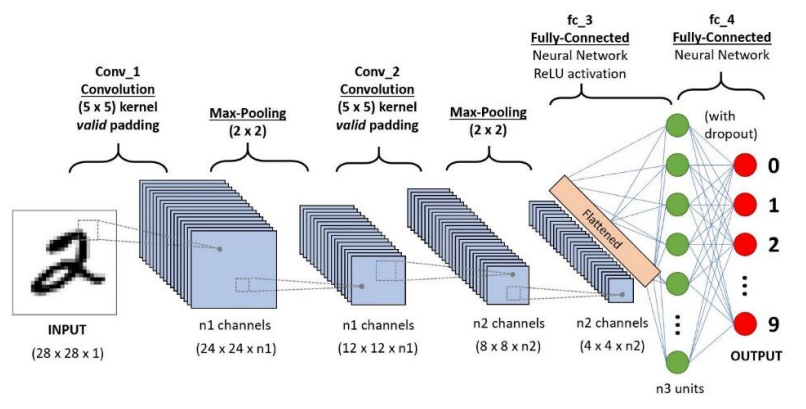

### CNN WORKING
A Convolutional Neural Networks Introduction so to speak.
#### * Step 1: Convolution Operation :-
The first building block in our plan of attack is convolution operation. In this step, 
we will touch on feature detectors, which basically serve as the neural network's 
filters. We will also discuss feature maps, learning the parameters of such maps, 
how patterns are detected, the layers of detection, and how the findings are 
mapped out.
#### * Step 1(b): ReLU Layer :-
The second part of this step will involve the Rectified Linear Unit or ReLU. We 
will cover ReLU layers and explore how linearity functions in the context of 
Convolutional Neural Networks.
Not necessary for understanding CNN's, but there's no harm in a quick lesson to 
improve your skills.
#### * Step 2: Pooling :-
In this part, we'll cover pooling and will get to understand exactly how it 
generally works. Our nexus here, however, will be a specific type of pooling; max 
pooling. We'll cover various approaches, though, including mean (or sum) 
pooling. This part will end with a demonstration made using a visual interactive 
tool that will definitely sort the whole concept out for you.
#### * Step 3: Flattening :-
This will be a brief breakdown of the flattening process and how we move from 
pooled to flattened layers when working with Convolutional Neural Networks.
#### * Step 4: Full Connection :-
In this part, everything that we covered throughout the section will be merged 
together. By learning this, you'll get to envision a fuller picture of how 
Convolutional Neural Networks operate and how the "neurons" that are finally 
produced learn the classification of images.


### Import All Necessary Files

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
import tensorflow as tf
# import cv2 as cv
# from google.colab.patches import cv2_imshow

### Read the Dataset

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 8s 1us/step


### Display Dimensions of training and testing data

In [4]:
print('X Training shape: ',x_train.shape)
print('Y Training shape: ',y_train.shape)
print('X Testing shape: ',x_test.shape)
print('Y Testing shape: ',y_test.shape)

X Training shape:  (60000, 28, 28)
Y Training shape:  (60000,)
X Testing shape:  (10000, 28, 28)
Y Testing shape:  (10000,)


* It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels.
* Image is 28 pixel of width and height

### Display the count of Labels

<AxesSubplot:ylabel='count'>

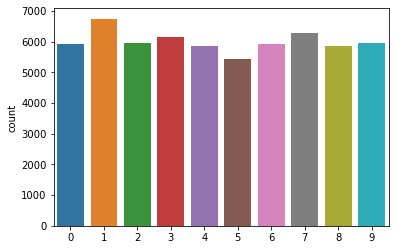

In [5]:
sns.countplot(y_train)

### Display any one image

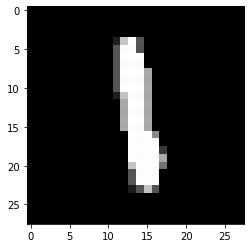

Digit in image is  1


In [6]:
plt.imshow(x_train[200], cmap='gray')
plt.show()
print("Digit in image is ",y_train[200])

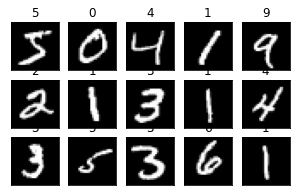

In [8]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
    ax = fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]),cmap = 'gray')
    ax.set_title(y_train[i])

In [7]:
input_shape = (28,28,1)

### View Dimension of image

In [9]:
x_train[200].shape

(28, 28)

In [5]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [10]:
x_train.reshape()

(60000, 28, 28, 1)

In [12]:
batch_size = 128
num_classes = 10
epochs = 5

### Converts a class vector (integers) to binary class matrix

In [14]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
# layer instances to the constructor:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

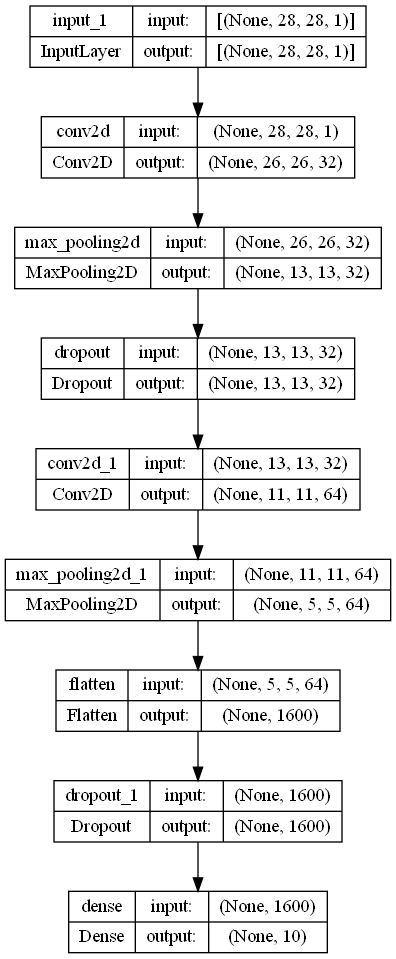

In [20]:
from keras.utils import  plot_model
plot_model(model, to_file='mnist_cnn.png', show_shapes=True)

In [16]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
batch_size = 130
num_classes = 10
epochs = 10

In [18]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
416/416 [==============================] - 59s 130ms/step - loss: 0.4915 - accuracy: 0.8452 - val_loss: 0.1114 - val_accuracy: 0.9705
Epoch 2/10
416/416 [==============================] - 54s 131ms/step - loss: 0.1645 - accuracy: 0.9497 - val_loss: 0.0842 - val_accuracy: 0.9780
Epoch 3/10
416/416 [==============================] - 53s 127ms/step - loss: 0.1243 - accuracy: 0.9616 - val_loss: 0.0623 - val_accuracy: 0.9828
Epoch 4/10
416/416 [==============================] - 53s 128ms/step - loss: 0.1038 - accuracy: 0.9671 - val_loss: 0.0522 - val_accuracy: 0.9848
Epoch 5/10
416/416 [==============================] - 52s 126ms/step - loss: 0.0913 - accuracy: 0.9721 - val_loss: 0.0468 - val_accuracy: 0.9862
Epoch 6/10
416/416 [==============================] - 55s 131ms/step - loss: 0.0863 - accuracy: 0.9741 - val_loss: 0.0489 - val_accuracy: 0.9860
Epoch 7/10
416/416 [==============================] - 29s 71ms/step - loss: 0.0800 - accuracy: 0.9755 - val_loss: 0.0408 - val_acc

In [19]:
print("Training Accuracy")
print(model.evaluate(x_train,y_train))
print("Test accuracy")
print(model.evaluate(x_test,y_test))

Training Accuracy
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0331 - accuracy: 0.9909
[0.033083681017160416, 0.9908666610717773]
Test accuracy
313/313 [==============================] - 4s 12ms/step - loss: 0.0354 - accuracy: 0.9885
[0.03542795777320862, 0.9884999990463257]


### View Model Performace

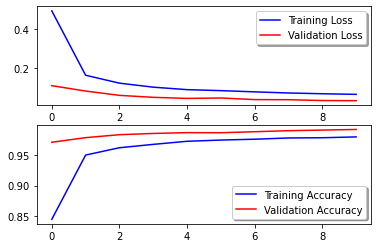

In [21]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [22]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 4s 12ms/step


### Plot Confusion Matrix

<AxesSubplot:>

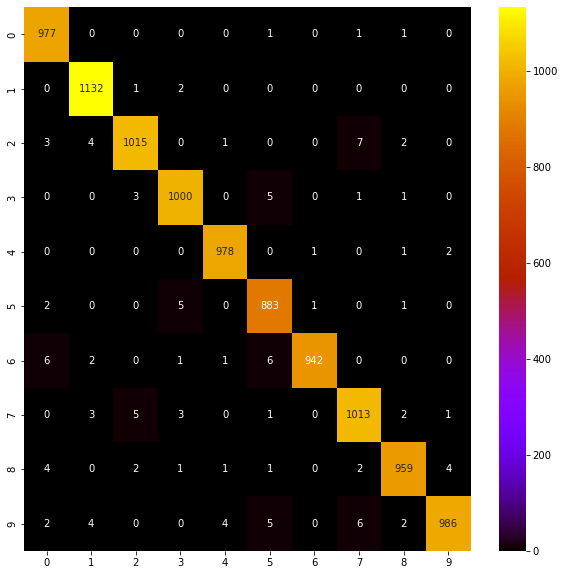

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_mtx, annot=True, fmt='g',cmap='gnuplot')

In [28]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(Y_true, Y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Save the model

In [29]:
model.save('mnist_cnn.h5')